In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


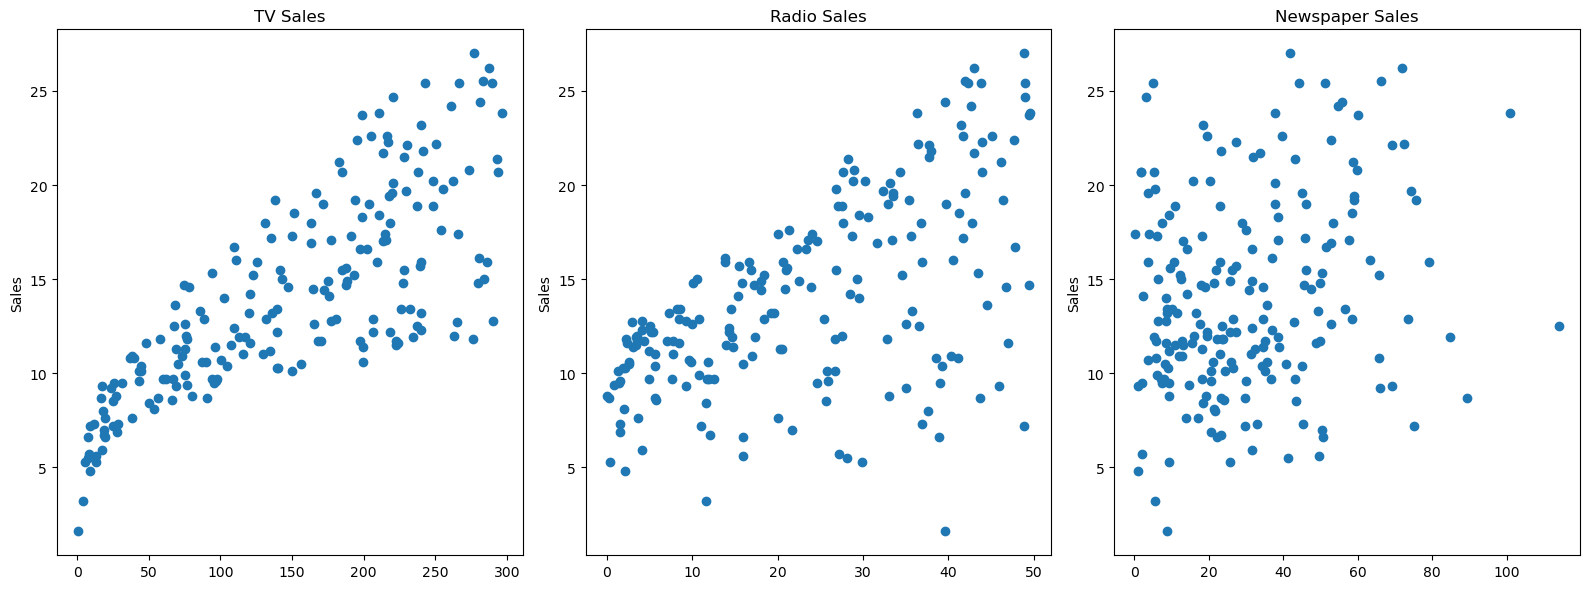

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Sales')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Sales')
plt.tight_layout()

In [5]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# test size -> what percentage of the total data do you want to be left to test with

In [8]:
len(df)

200

In [9]:
len(X_train)

140

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [15]:
# Performance Evaluation

In [16]:
# mean absolute error - mean of the absolute value of the errors
# problem: doesn't really account for large deviations from the trend line

# mean squared error - mean of the sum of the square of the errors 
# large errors are punished more with this method so it is often preferred over MAE
# problem - reports error back in units of y squared and not y

# root mean square error - square root of MSE 
# usually this is the most preferred error metric 


X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [17]:
test_predictions = model.predict(X_test)

In [18]:
test_predictions
# now we have an array of predicted values and want to compare them to their respective actual values
# using the above error methods

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

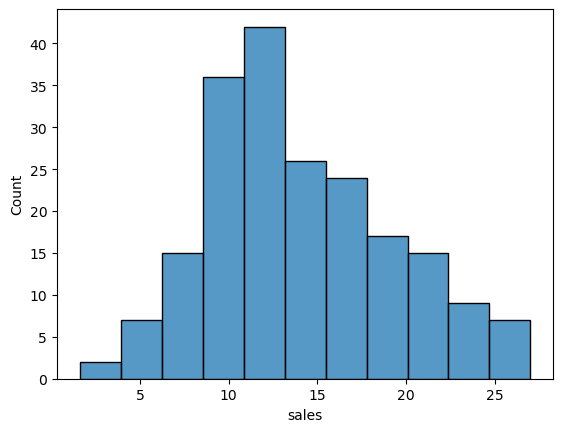

In [21]:
sns.histplot(data = df, x = 'sales')

In [22]:
mean_absolute_error(y_test, test_predictions)

# compare this 1.21 to the df['sales'].mean() = 14.02
# roughly a 10% error rate


1.2137457736144808

In [23]:
mean_squared_error(y_test, test_predictions)
# this value punishes large deviations from the actual data
# however cannot directly compare to the mean of the sales data because they are in different units
# dollars vs dollars squared

2.2987166978863787

In [24]:
np.sqrt(mean_squared_error(y_test, test_predictions))
# Root Mean Square Error (RMSE)
# Also hovering around 10%

# If your mean absolute error is ok but your RMSE is large 
# that is indicative of a model that works for most data points but is largely off for a few data points

1.5161519375993882

In [25]:
test_residuals = y_test - test_predictions

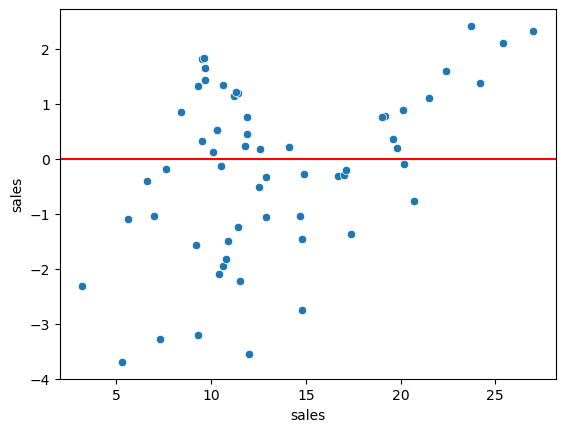

In [26]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red')

# the randomness of the distribution is a good sign
# if there were a seeming pattern that would be an indicator that a linear regression was a poor choice

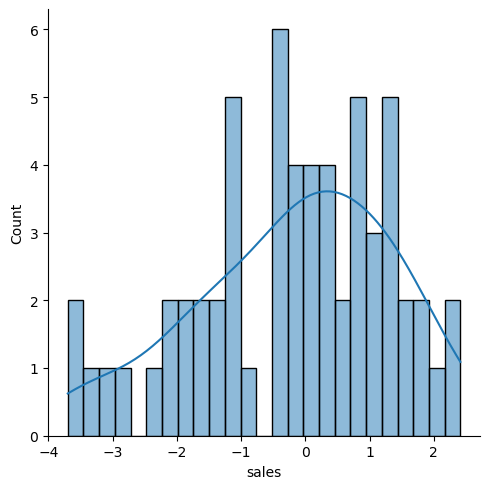

In [27]:
sns.displot(test_residuals, bins = 25, kde = True)
# looking for the distribution to be centered on or around 0 ideally

In [28]:
import scipy as sp

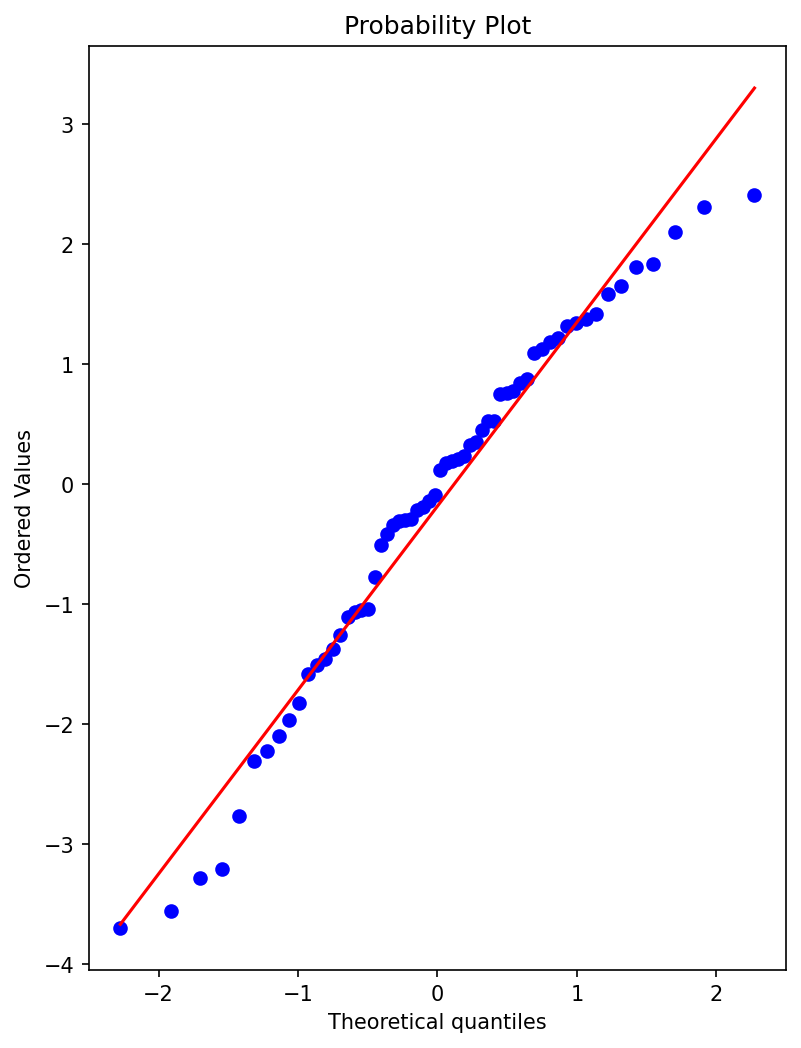

In [29]:
# create a figure and axis to plot on
fig, ax = plt.subplots(figsize = (6,8), dpi = 150)
# probplot returns the raw values if needed
# we just want to see the plot so we assign the values to _
_ = sp.stats.probplot(test_residuals, plot =ax)

# red line is a normal distribution so ideally points should be along line

In [30]:
# Model deployment and coefficient interpretation

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(X,y)
# we've decided the test model did good enough on the test set and now we can apply it to the whole dataset 

LinearRegression()

In [33]:
final_model.coef_
# for every one unit of tv spending expect 0.04 increase in sales

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
y_hat = final_model.predict(X)

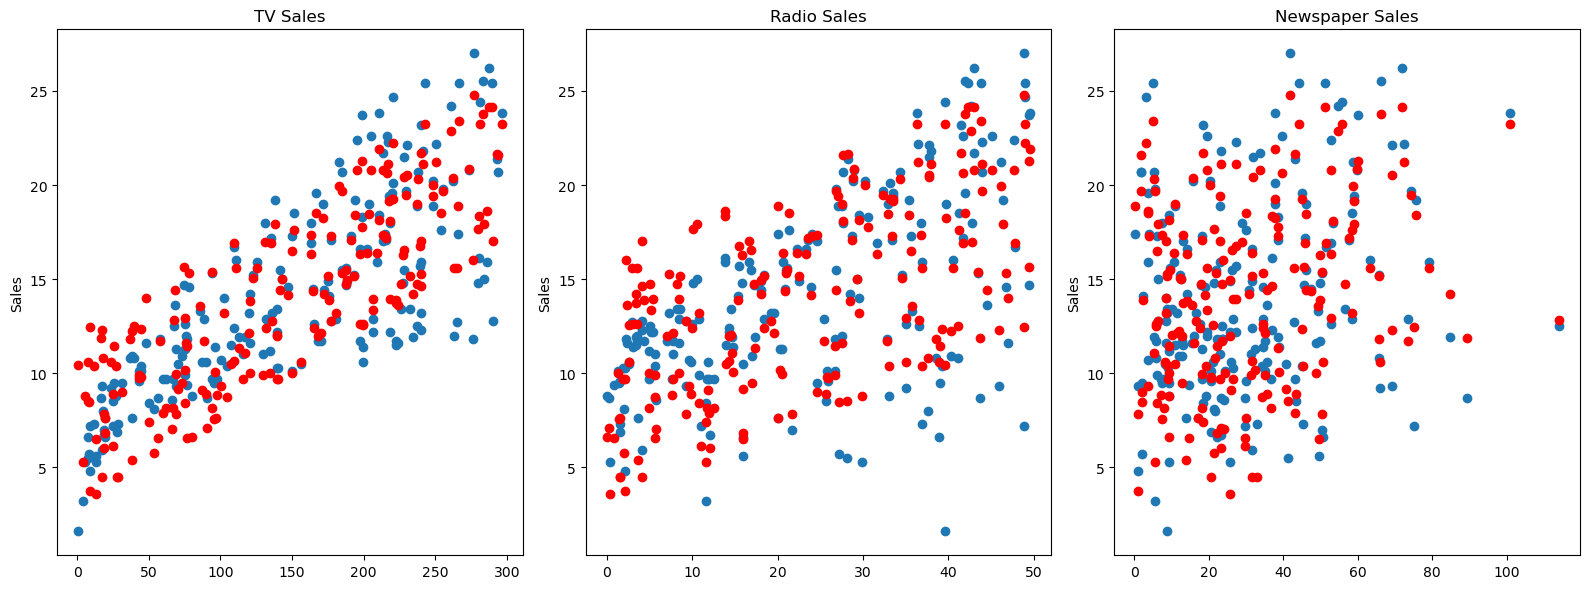

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Sales')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color = 'red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Sales')
plt.tight_layout()

# how to compare regression predictions against actual values

In [37]:
# model persistence, how to save and reuse a model
from joblib import dump, load

In [38]:
dump(final_model, 'final_sales_model.joblib')
# this is now a saved model that can be sent to someone else

['final_sales_model.joblib']

In [39]:
loaded_model = load('final_sales_model.joblib')
# this is how someone would load the model and then begin to use it

In [46]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [47]:
X.shape

(200, 3)

In [48]:
# 149 TV, 22 radio, 12 newspaper
# Estimate sales
campaign = [[149,22,12]]
loaded_model.predict(campaign)
# we get an estimated sales value of ~14

C:\Users\Eddie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])